# Predicting Molecular Lipophilicity (LogP) using Machine Learning #

## Introduction

Lipophilicity is a chemical property that describes how well a molecule can dissolve in fats, oils, and lipids, compared to water. It is often measured by the LogP value — the logarithm of a compound's partition coefficient between octanol and water.

In drug discovery and design, lipophilicity plays a crucial role:
- It influences a drug's absorption, distribution, metabolism, and excretion (ADME) properties.
- It affects membrane permeability and solubility.
- Compounds with extremely high or low lipophilicity often fail in drug development.

**Why predict lipophilicity using Machine Learning?**
- Experimental measurement of LogP can be expensive and time-consuming.
- By using molecular descriptors (numerical representations of a molecule’s structure), machine learning models can predict LogP efficiently.
- This helps prioritize promising molecules early in drug development.

This project involves -
  
*  building a machine learning pipeline to predict LogP based on molecular descriptors
* comparison of different models
* interpretation of the results

**1. Importing Libraries**

In [42]:
import pandas as pd                                   # for data-handling (loading and data manupulation)
import numpy as np                                    # for numerical operations
import matplotlib.pyplot as plt                       # for plotting graph
import seaborn as sns                                 # for visually appealing plots

# sklearn = provides ML tools
from sklearn.model_selection import train_test_split  # for splitting the data into training and test-sets
from sklearn.preprocessing import StandardScaler      # for scaling the data

# using regression models to make predictions -
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # to evaluate how well the model performs

**2. Loading the dataset file**

In [43]:
df = pd.read_csv('Lipophilicity.csv')
df.head()                               # readingh first few rows of the dataset

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


**3. Installing RDkit**
- this library lets create variables which represent molecules and retrieve information about the molecules

In [44]:
pip install rdkit

**4. Turning textual representation of molecules (SMILES) into ML models**

In [45]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# function to extract features from each molecule
def featurize(smiles):

  #convert SMILES string into a molecule object
  mol = Chem.MolFromSmiles(smiles)
  if mol:
    return {
        'MolWt': Descriptors.MolWt(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'MolLogP': Descriptors.MolLogP(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
      }
  else:
      return

**5. Applying feature extraction to every molecule**

In [46]:
# applying featurization function to each row
features = df['smiles'].apply(featurize)

# convert feature dictionaries to a DataFrame
features_df = pd.DataFrame([x for x in features if x is not None])

# match the cleaned data with the features and clean out the molecules that did not convert
df = df.loc[features_df.index].reset_index(drop=True)
features_df = features_df.reset_index(drop=True)

# concatenate the original DataFrame with the new features DataFrame
df = pd.concat([df, features_df], axis=1)
df.head()

,CMPD_CHEMBLID,exp,smiles,MolWt,NumRotatableBonds,MolLogP,NumHDonors,NumHAcceptors
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,340.858,3,3.5489,0,4
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,494.591,9,2.9901,2,7
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,321.829,3,3.6739,0,4
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,419.890,5,1.9237,4,5
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,381.480,6,2.0069,2,5


**6. Splitting the dataset into training and test-sets**

In [49]:
# separate input feactures and output labels
X = df[['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors']]
Y = df['exp'] # targetted experimental LogP

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**7. Training the Machine Learning Model**

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

**8. Making predictions and evaluating the model**

In [50]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
root_mean_squared_error = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mean_squared_error)
print("R-squared:", r2)

Mean Squared Error: 0.9868029228217375
Root Mean Squared Error: 0.9933795462066538
R-squared: 0.3321015481813482


**9. Plotting the Scatter Plot**
- It helps visualize how close the model's predictions are to the actual values.
- If the model were perfect, all points would lie exactly on a straight diagonal line (where Actual = Predicted).

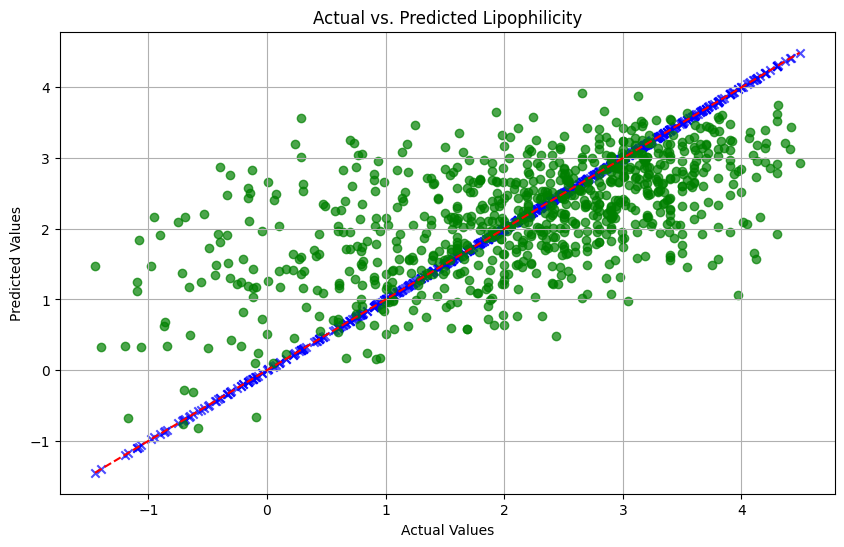

The graph limits-
-1.45 4.49
-0.8184999999999999 3.9195999999999986


In [51]:
plt.figure(figsize=(10, 6))                             # plot size: width = 10 units, height = 6 units

# Plotting actual values (Y_test) with a specific shape and color
plt.scatter(Y_test, Y_test, alpha=0.7, color='blue', marker='x', label='Actual Values')

# Plotting predicted values (Y_pred) with a different shape and color
plt.scatter(Y_test, Y_pred, alpha=0.7, color='green', marker='o', label='Predicted Values')

# Create a line y=x for reference
x = np.linspace(Y_test.min(), Y_test.max(), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Lipophilicity')
plt.grid(True)
plt.show()

print("The graph limits-")
print(Y_test.min(), Y_test.max())
print(Y_pred.min(), Y_pred.max())


**10. Plotting the Histogram**
- They help to see the spread of each descriptor.
- They help in identifying if any feature is heavily skewed as this may sometimes affect the model.

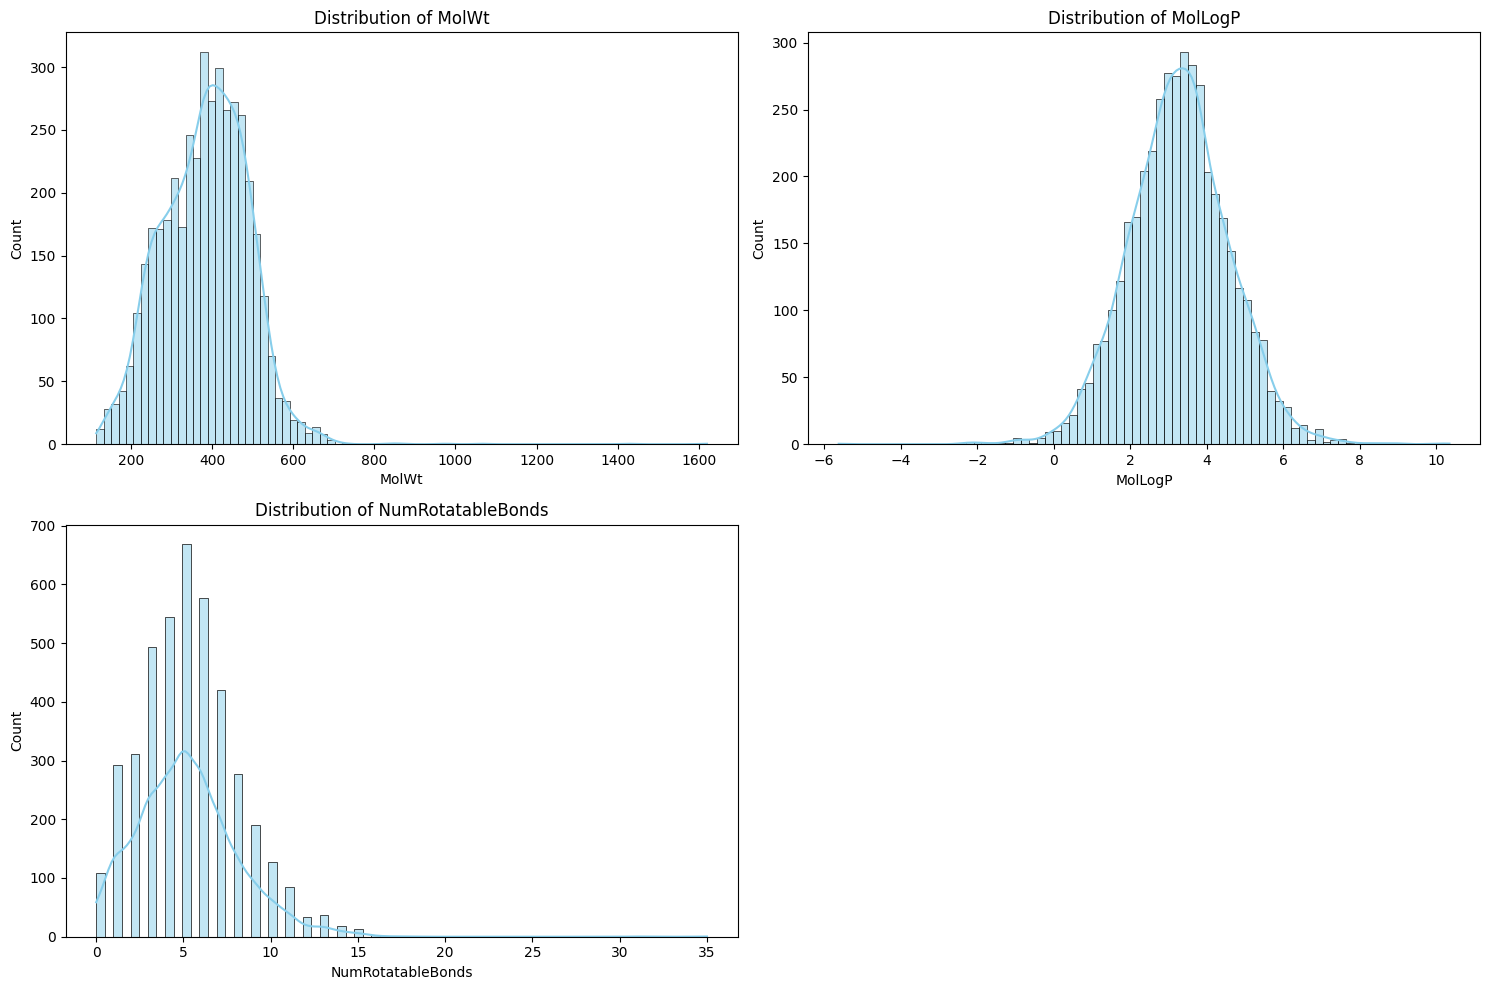

In [52]:
features = ['MolWt', 'MolLogP', 'NumRotatableBonds']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**11. Plotting the Correlation Heatmap**
- It shows how strongly each feature is related to others and to LogP.
- It helps identify redundant features i.e, to identify if two features are very strongly correlated.

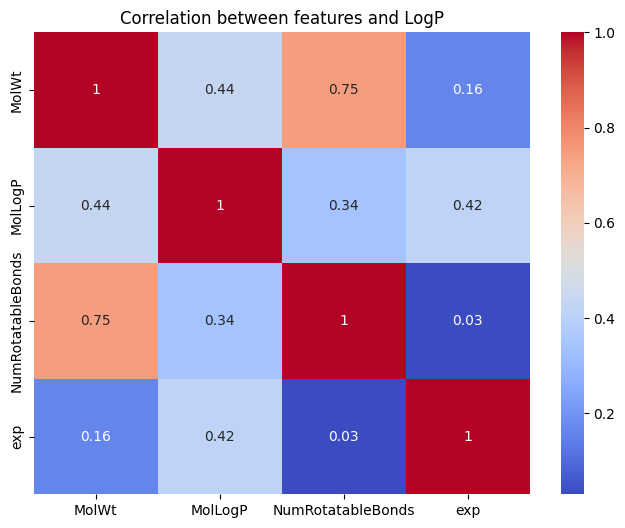

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['exp']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features and LogP')
plt.show()

**12. Plotting a Feature Map**

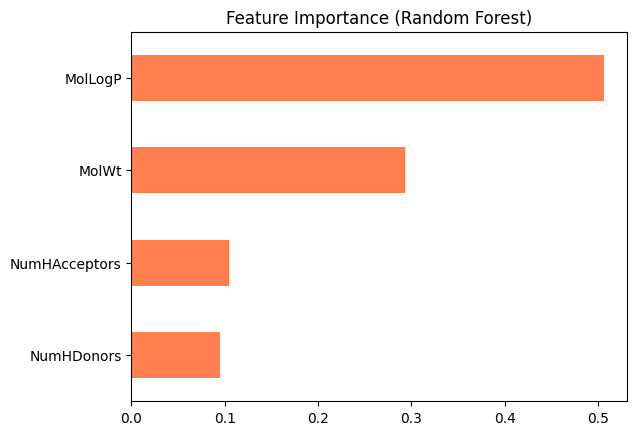

In [54]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='coral')
plt.title('Feature Importance (Random Forest)')
plt.show()
